Skipping dataset .DS_Store: missing images or labels directory.
Loaded 40 samples from /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/resampled/train
Dataset size: 40
Image shape: torch.Size([1, 192, 192, 192]), Label shape: torch.Size([1, 192, 192, 192])


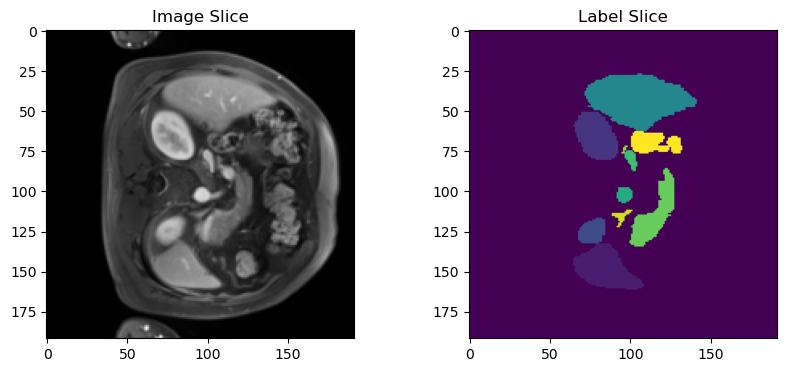

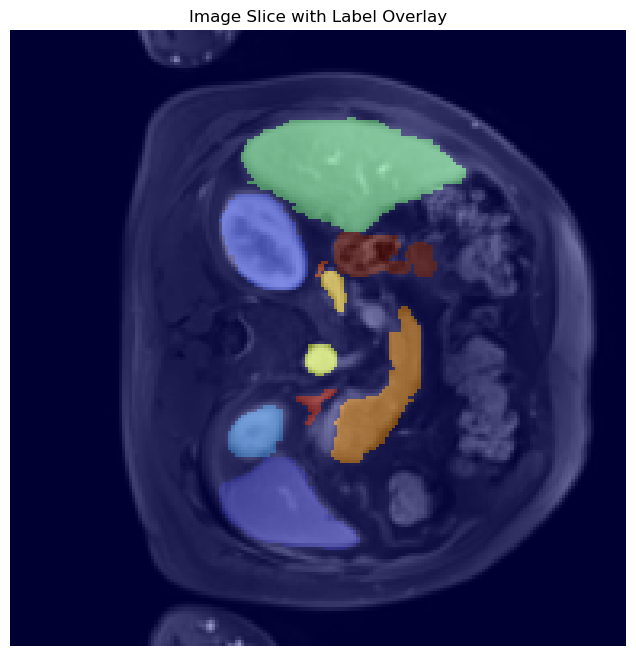

Batch 0: images shape torch.Size([2, 1, 192, 192, 192]), labels shape torch.Size([2, 1, 192, 192, 192])


In [5]:
import sys
import os

# Add project root to Python path
sys.path.append(os.path.abspath('..'))

from utils.dataloader import CombinedDataset, combined_transform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

split_dir = '/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/resampled/train'
dataset = CombinedDataset(split_dir=split_dir, transform=combined_transform)
print(f"Dataset size: {len(dataset)}")

# Visualize one sample
image, label = dataset[0]
print(f"Image shape: {image.shape}, Label shape: {label.shape}")

# Convert to numpy
image_np = image.squeeze().numpy()
label_np = label.squeeze().numpy()
mid_slice = image_np.shape[2] // 2

# Visualize slice side by side
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_np[:, :, mid_slice], cmap='gray')
plt.title('Image Slice')

plt.subplot(1, 2, 2)
plt.imshow(label_np[:, :, mid_slice])
plt.title('Label Slice')
plt.show()

# Visualize image with label overlay
plt.figure(figsize=(8, 8))
plt.imshow(image_np[:, :, mid_slice], cmap='gray')
plt.imshow(label_np[:, :, mid_slice], cmap='jet', alpha=0.4)
plt.axis('off')
plt.title('Image Slice with Label Overlay')
plt.show()

# Test DataLoader batching
loader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2)
for batch_idx, (images, labels) in enumerate(loader):
    print(f"Batch {batch_idx}: images shape {images.shape}, labels shape {labels.shape}")
    break  # Just one batch for testing


Skipping dataset .DS_Store: missing images or labels directory.
Loaded 40 samples from /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/resampled/train
Skipping dataset .DS_Store: missing images or labels directory.
Loaded 40 samples from /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/resampled/train
Dataset size: 40
Original Image shape: torch.Size([1, 192, 192, 192]), Label shape: torch.Size([1, 192, 192, 192])
Transformed Image shape: torch.Size([1, 192, 192, 192]), Label shape: torch.Size([1, 192, 192, 192])


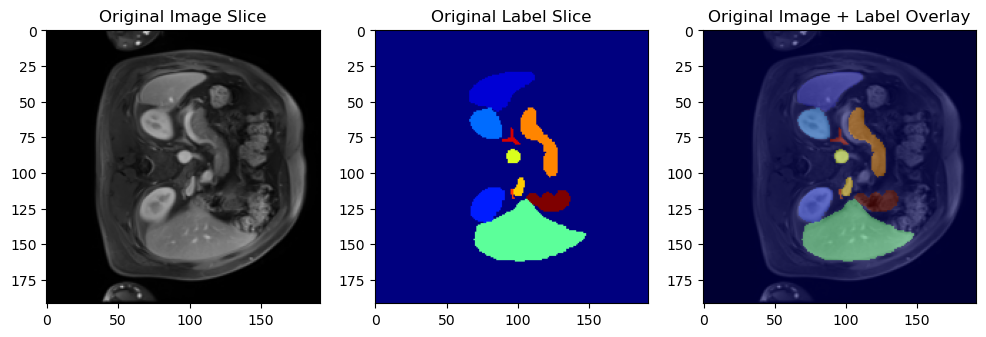

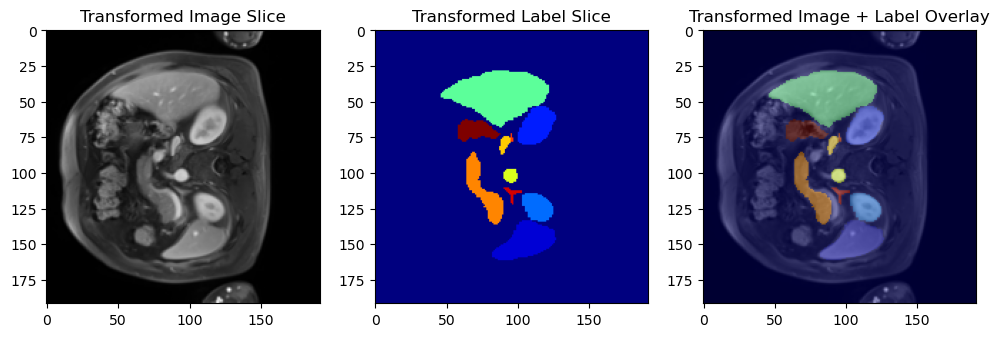

Batch 0: images shape torch.Size([2, 1, 192, 192, 192]), labels shape torch.Size([2, 1, 192, 192, 192])


In [6]:
import sys
import os

# Add project root to Python path
sys.path.append(os.path.abspath('..'))

from utils.dataloader import CombinedDataset, combined_transform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

split_dir = '/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/resampled/train'

# Dataset without transforms
dataset_no_transform = CombinedDataset(split_dir=split_dir, transform=None)
# Dataset with transforms
dataset_with_transform = CombinedDataset(split_dir=split_dir, transform=combined_transform)

sample_idx = 0  # You can pick any index < len(dataset)
print(f"Dataset size: {len(dataset_no_transform)}")

# 1️⃣ Fetch the original sample
orig_image, orig_label = dataset_no_transform[sample_idx]
print(f"Original Image shape: {orig_image.shape}, Label shape: {orig_label.shape}")

# 2️⃣ Fetch the transformed sample
transf_image, transf_label = dataset_with_transform[sample_idx]
print(f"Transformed Image shape: {transf_image.shape}, Label shape: {transf_label.shape}")

# Convert to numpy
orig_image_np = orig_image.squeeze().numpy()
orig_label_np = orig_label.squeeze().numpy()
transf_image_np = transf_image.squeeze().numpy()
transf_label_np = transf_label.squeeze().numpy()

# Choose a slice
mid_slice = orig_image_np.shape[2] // 2

# 3️⃣ Visualize Original Sample
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(orig_image_np[:, :, mid_slice], cmap='gray')
plt.title('Original Image Slice')

plt.subplot(1, 3, 2)
plt.imshow(orig_label_np[:, :, mid_slice], cmap='jet')
plt.title('Original Label Slice')

plt.subplot(1, 3, 3)
plt.imshow(orig_image_np[:, :, mid_slice], cmap='gray')
plt.imshow(orig_label_np[:, :, mid_slice], cmap='jet', alpha=0.4)
plt.title('Original Image + Label Overlay')
plt.show()

# 4️⃣ Visualize Transformed Sample
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(transf_image_np[:, :, mid_slice], cmap='gray')
plt.title('Transformed Image Slice')

plt.subplot(1, 3, 2)
plt.imshow(transf_label_np[:, :, mid_slice], cmap='jet')
plt.title('Transformed Label Slice')

plt.subplot(1, 3, 3)
plt.imshow(transf_image_np[:, :, mid_slice], cmap='gray')
plt.imshow(transf_label_np[:, :, mid_slice], cmap='jet', alpha=0.4)
plt.title('Transformed Image + Label Overlay')
plt.show()

# 5️⃣ Test DataLoader batching
loader = DataLoader(dataset_with_transform, batch_size=2, shuffle=True, num_workers=2)
for batch_idx, (images, labels) in enumerate(loader):
    print(f"Batch {batch_idx}: images shape {images.shape}, labels shape {labels.shape}")
    break  # Just one batch for testing
